# Final project: Restaurants Ratings Prediction
<hr>

# Objectives

**Why there is a need of better rating?**<br>
- Restaurants charges less commission for higher rating 
- Restaurants has filter options(rating 3.5+) which displays better rated restaurants in the search
- Restaurant shows on top over the other insearch
- Attracts more footfall to the Restaurants.

<a id='library'></a>
# 1. Importing Librabries

In [1]:
#importing all the libraries here
#imorting numpty and pandas to handle dataframe
import numpy as np
import pandas as pd
#import matplotlib to plot graphs
import matplotlib.pyplot as plt

#splting data into train and test data
from sklearn.model_selection import train_test_split
#importing simple imputer to deal with missing values
from sklearn.impute import SimpleImputer
#Used Minax Scalar for scaling values between [0,1]
from sklearn.preprocessing import MinMaxScaler

#bencahmarck model and evaluration metrics
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Librabries for creating and training neural Networks
import torch

#helper function
from helper import *

#functions for exploratory visualizations
import visuals as vs

#functions for training,processing and predicitng
import train as tr
import predict as pr

%matplotlib inline 

In [2]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
import seaborn as sns
from scipy.stats import zscore

In [3]:
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.impute import KNNImputer

In [4]:
import nltk, re
# nltk.download('stopwords')
from nltk.corpus import stopwords

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import lightgbm as lgb
import eli5
import time
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from pdpbox import pdp, get_dataset, info_plots
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, train_test_split

from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import lightgbm as lgb
from bayes_opt import BayesianOptimization
# import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import r2_score
import pickle
random_state=42
np.random.seed(random_state)
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
C:\Users\sahil.kumar\.conda\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\sahil.kumar\.conda\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


 <a id='dataexploration'></a>
# 2. Exploring Data

In [5]:
#copying data in csv file to dataframe
restaurant_df = pd.read_csv("TA_restaurants_curated.csv", low_memory=False)

In [6]:
restaurant_df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Name,Martine of Martine's Table,De Silveren Spiegel,La Rive,Vinkeles,Librije's Zusje Amsterdam
City,Amsterdam,Amsterdam,Amsterdam,Amsterdam,Amsterdam
Cuisine Style,"['French', 'Dutch', 'European']","['Dutch', 'European', 'Vegetarian Friendly', '...","['Mediterranean', 'French', 'International', '...","['French', 'European', 'International', 'Conte...","['Dutch', 'European', 'International', 'Vegeta..."
Ranking,1,2,3,4,5
Rating,5,4.5,4.5,5,4.5
Price Range,$$ - $$$,$$$$,$$$$,$$$$,$$$$
Number of Reviews,136,812,567,564,316
Reviews,"[['Just like home', 'A Warm Welcome to Wintry ...","[['Great food and staff', 'just perfect'], ['0...","[['Satisfaction', 'Delicious old school restau...","[['True five star dinner', 'A superb evening o...","[['Best meal.... EVER', 'super food experience..."
URL_TA,/Restaurant_Review-g188590-d11752080-Reviews-M...,/Restaurant_Review-g188590-d693419-Reviews-De_...,/Restaurant_Review-g188590-d696959-Reviews-La_...,/Restaurant_Review-g188590-d1239229-Reviews-Vi...,/Restaurant_Review-g188590-d6864170-Reviews-Li...


In [7]:
restaurant_df.shape

(125527, 11)

In [8]:
#.info() function is used to get a concise summary of the dataframe
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 11 columns):
Unnamed: 0           125527 non-null int64
Name                 125527 non-null object
City                 125527 non-null object
Cuisine Style        94176 non-null object
Ranking              115876 non-null float64
Rating               115897 non-null float64
Price Range          77672 non-null object
Number of Reviews    108183 non-null float64
Reviews              115911 non-null object
URL_TA               125527 non-null object
ID_TA                125527 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 10.5+ MB


In [9]:
restaurant_df.isnull().sum()

Unnamed: 0               0
Name                     0
City                     0
Cuisine Style        31351
Ranking               9651
Rating                9630
Price Range          47855
Number of Reviews    17344
Reviews               9616
URL_TA                   0
ID_TA                    0
dtype: int64

### 2.1 Missing Data Analysis
Surely, there is missing data. Let us now see how much of it is missing

Missing values in train data :  125447


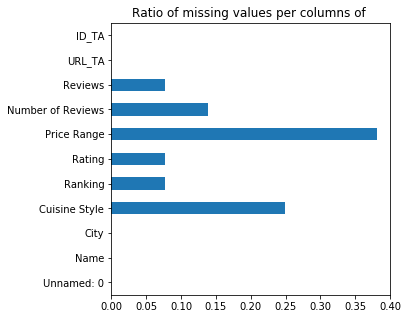

In [10]:
def check_missing_values(train_files):
       
        plt.figure(figsize=(5, 5))
        train_files.isnull().mean(axis=0).plot.barh()
        plt.title("Ratio of missing values per columns of ")
        
        train_missing=train_files.isnull().sum().sum()
        print('Missing values in train data : ',train_missing)
        
check_missing_values(restaurant_df)

#### Note:-
- This says we have missing values in **Cuisine Style, Ranking, Rating, Price Range, Number of Reviews, Reviews**
- **"Unnamed: 0"** which is int, **"Ranking", "Rating",** and **"Number"** of Reviews are float, so we can get stats only for this column as of now.
- remaining all object type

**Inference**
- More than 38% of Price Range are missing
- More than 25% of Cuisine Style are missing
- More than 7% of Rating and Reviews is missing
- close to 8% of rate are missing
- close to 15% of Number of Reviews are missing

In [11]:
restaurant_df.isnull().sum().sum()

125447

In [12]:
restaurant_df.columns

Index(['Unnamed: 0', 'Name', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

This shows the list of columns in the given dataset

In [13]:
restaurant_df.describe()

,Unnamed: 0,Ranking,Rating,Number of Reviews
count,125527.000000,115876.000000,115897.000000,108183.000000
mean,3974.686131,3657.463979,3.987441,125.184983
std,4057.687698,3706.255301,0.678814,310.833311
min,0.000000,1.000000,-1.000000,2.000000
25%,1042.000000,965.000000,3.500000,9.000000
50%,2445.000000,2256.000000,4.000000,32.000000
75%,5626.000000,5237.000000,4.500000,114.000000
max,18211.000000,16444.000000,5.000000,16478.000000


**Note**:-
- as min value is -1, this means that we have restaurent with minimum  **Rating**.
- we have a restaurent with highest rating is 5.
<br>
- as min value is 2, this means that we have restaurent with minimum  **Number of Reviews**.
- we have a restaurent with highest Number of Reviews is 16478.
<br>
- as min value is 1, this means that we have restaurent with starting with **Ranking** 1.
- we have a restaurent with maximum Ranking is 16444.

### 2.2 Checking Duplicates values and drop it.

In [14]:
def check_duplicate(train_files):
    
        print('\nDataset: ')
        print('Dupplicate entries: {}'.format(train_files.duplicated().sum()))
        
#       If duplicate entries drop the duplicates values
        train_files.drop_duplicates(inplace = True) 
        print('Dupplicate after applying: {}'.format(train_files.duplicated().sum()))
check_duplicate(restaurant_df)


Dataset: 
Dupplicate entries: 0
Dupplicate after applying: 0


Here we can see that there is no duplicay in dataset

**About Data set**
- Dataset size: 125527 rows x 11 columns
- All columns are of type "object" except for **"Unnamed: 0"** which is int, **"Ranking", "Rating",** and **"Number"** of Reviews are float.
- 9630 ratings are missing in the rating column
- 9651 Ranking are missing in the Ranking column
- 47855 are mising Price Range 
- 17344 Number of Reviews are missing
- 31351 Cuisine Style are missing
- 9616 Reviews are missing
- No duplicated row
- Basic statistics is discussed after processing the data <a href="#stats">click here for stats</a>

**Columns details**

o	**Name**: name if the restaurant<br>
o	**City**: city location of the restaurant<br>
o	**Cuisine Style:** cuisine style(s) of the restaurant, in a Python list object (94 046 non-null)<br>
o	**Ranking:** rank of the restaurant among the total number of restaurants in the city as a float object (115 645 non-null)<br>
o	**Rating:** rate of the restaurant on a scale from 1 to 5, as a float object (115 658 non-null)(Target Column)<br>
o	**Price Range:** price range of the restaurant among 3 categories , as a categorical type (77 555 non-null)<br>
o	**Number of Reviews:** number of reviews that customers have let to the restaurant, as a float object (108 020 non-null)<br>
o	**Reviews:** 2 reviews that are displayed on the restaurants scrolling page of the city, as a list of list object where the first list contains the 2 reviews, and the second le dates when these reviews were written (115 673 non-null)<br>
o	**URL_TA:** part of the URL of the detailed restaurant page that comes after 'www.tripadvisor.com' as a string object (124 995 non-null)<br>
o	**ID_TA:** identification of the restaurant in the TA database constructed a one letter and a number (124 995 non-null)<br>


### 2.3 Renaming dataset

In [15]:
restaurant_df = restaurant_df.rename(columns={'Cuisine Style': 'cuisines', 
                                                    'Rating':'rate', 
                                                    'City': 'city',
                                                    'Number of Reviews':'number_of_reviews',
                                                    "Price Range": "price_range",
                                                    "Name":'name',
                                                    'Ranking':'ranking',
                                                    'Reviews':'reviews',
                                                    'Unnamed: 0':'unnamed'})

In [16]:
restaurant_df.columns

Index(['unnamed', 'name', 'city', 'cuisines', 'ranking', 'rate', 'price_range',
       'number_of_reviews', 'reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

In [17]:
restaurant_df.head()

,unnamed,name,city,cuisines,ranking,rate,price_range,number_of_reviews,reviews,URL_TA,ID_TA
0,0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


### 2.4 Dropping columns 

**Note**
- After Studying the data we can clearly delete the following columns as the make are not useful for our analysis **"URL_TA", 'unnamed','ID_TA'**.


In [18]:
# restaurant_df.drop(columns=["URL_TA", 'unnamed','ID_TA','price_range'], inplace  =True)
restaurant_df.drop(columns=["URL_TA", 'unnamed', 'ID_TA'], inplace  =True)

In [19]:
restaurant_df.isna().sum()

name                     0
city                     0
cuisines             31351
ranking               9651
rate                  9630
price_range          47855
number_of_reviews    17344
reviews               9616
dtype: int64

In [20]:
restaurant_df.tail()

,name,city,cuisines,ranking,rate,price_range,number_of_reviews,reviews
125522,Konrad Kaffee- & Cocktailbar,Zurich,NaN,NaN,NaN,NaN,NaN,NaN
125523,Blueberry American Bakery,Zurich,['Cafe'],NaN,NaN,NaN,NaN,NaN
125524,Restaurant Bahnhof,Zurich,NaN,NaN,NaN,NaN,NaN,NaN
125525,Yoyo Pizza,Zurich,['Fast Food'],NaN,NaN,NaN,NaN,NaN
125526,dieci,Zurich,"['Italian', 'Pizza', 'Mediterranean', 'Diner']",NaN,NaN,$$ - $$$,NaN,NaN


<a id='visualization'></a>
# 3.Data Preprocessing and Exploring visulization
Visualizing columns using matplotlib and seaborn

<a id='rating'></a>
## 3.1 Rating bar plot

### 3.1.1 Ratings Between -1-5 with interval 0.5

In this section I have
> - Visualized the ratings, normal curve formded by the count of unique ratings using bar graph<br>
> -  Visualized the color bins for the ratings of the restaurant using bar graph

The ratings are in the form of string '3.5' containing spaces in some and have few missing values in form of NaNs<br>
The Ratngs are in the form:
   - *'3.5'* -> rating out of 5
   - *NaNs* -> missing ratings in the column

In [21]:
def rating_curve(df):
    '''
    plots bar graph for counts of unique values in rate column
    
    '''
    
    #return the numerical value of ratings from string
    rate = df.apply(lambda x: x.rate.replace(" ","") if type(x.rate) == str else x.rate, axis=1).value_counts().sort_index()
    #Ratio of the ratings, total number of ratios = total number rows - sum of missing values)
    rate = rate/(df.shape[0] - df['rate'].isnull().sum())
    
    #x,y position of the text(ratio) for the bar graph
    y = rate.get_values().tolist()
    x = [x for x in range(len(y))]
    zip_x_y_str = zip(x,[y1 + .0008 for y1 in y] ,y)
    
    colors_list = ['grey'] + ['orangered'] + ['gold']*5  + ['yellow']*5 + ['yellowgreen']*5 + ['limegreen']*5 + ['green']*5 + ['darkgreen']*5 +['grey']
    
    fig, ax = plt.subplots(figsize=(20, 10))
    ax = rate.plot(kind='bar', color=colors_list, grid=True, title='Distribution of Ratings' )
    ax.set_xlabel('Ratings') 
    ax.set_ylabel('Percentage')
    #text on bar plots
    for x,y,s in zip_x_y_str:
        #print(x,y,s)
        s = round(s,3)
        ax.text(x,y,str(s), horizontalalignment='center',verticalalignment='center')
        

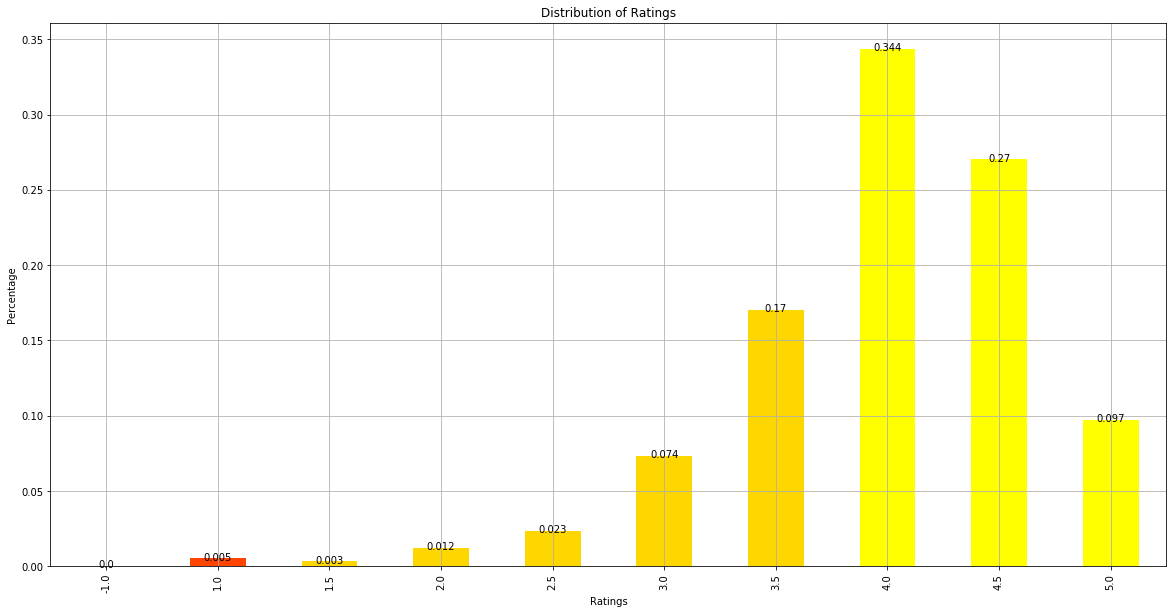

In [22]:
rating_curve(restaurant_df)

> **Interpretation:** The rating count is fitted inside a normal curve centered around 4 rating. .2% of ratings are not goven yet to the restauants. 

### 3.1.2 Ratings Color bins

Restaurant has 8 colored bins with dark green containing the highest top  ratings 4.0 and red containing the lowest rating 1,visualizing the ratios for each bin.<br> There are two more bins marked as 

> **For this project, the model is trained to predict these colored bins**

In [23]:
def color_bins(df):
    '''
    plots bar graph for different rating bins
    
    '''
    
    #ratios for the color bins
    #rates_to_color_code function returns the color of the rating
    rate_colors = df.apply(lambda x: rates_to_color_code(x.rate), axis=1).value_counts().sort_index()
    rate_colors = rate_colors/df.shape[0]
    
    #x,y and string(ratio)
    y = np.round(rate_colors.get_values(),4).tolist()
    x = [x for x in range(len(y))]
    zip_x_y_str = zip(x,[y1 + .008 for y1 in y] ,y)
    
    colors_list = ['grey','orangered','gold','yellow','yellowgreen','limegreen','green','darkgreen','grey']
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = rate_colors.plot(kind='bar', color=colors_list, grid=True, title='Rating Color Category Bins' )
    ax.set_xlabel('Rating Bins and color Category') 
    ax.set_ylabel('Percentage')
    for x,y,s in zip_x_y_str:
        #print(x,y,s)
        s = round(s,4)
        ax.text(x,y,str(s), horizontalalignment='center',verticalalignment='center')
        

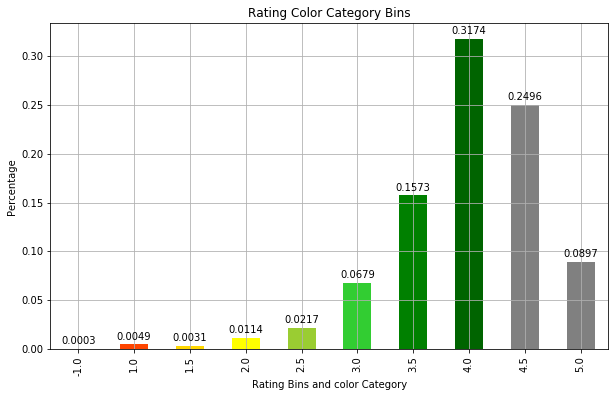

In [24]:
vs.color_bins(restaurant_df)

**Ratios of the Restaurants**
- 31.74% of the restaurants have ratings 4.0. 
- 24.96% of the restaurants have ratings 4.5.
- Only 8.97% of the restaurants have ratings 5.
- Only 33.97% of the restaurant falls on the right of the curve

In [25]:
def column_nan_ratios(data):
    ''' 
    Function takes in DataFrame and displays bar graph of percentage of NaNs per column
    
    Args:
    -----
    DataFrame 
    '''
    nan_per_col_percentage=[]
    nan_per_col_percentage = data.isnull().sum().values/data.shape[0]
    col_names = data.columns
    df = pd.DataFrame({'Percentage missing': nan_per_col_percentage}, index=col_names)
    ax = df.plot.bar(rot=0,figsize=(20,4))
    plt.xticks(rotation=90)
    plt.title('Percentage missing in each column')
    plt.xlabel('Column Name')
    plt.ylabel('Percentage')
    plt.grid(color='g', linestyle='-', linewidth=.5)
    plt.show()

### 3.1.3 Missing value analyse for rate

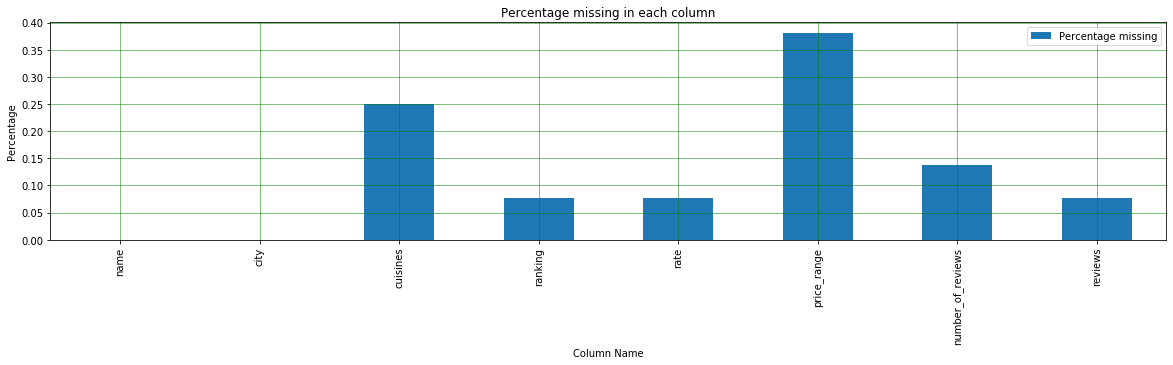

In [26]:
column_nan_ratios(restaurant_df)

In [27]:
restaurant_df.shape

(125527, 8)

In [28]:
restaurant_df.isnull().sum()

name                     0
city                     0
cuisines             31351
ranking               9651
rate                  9630
price_range          47855
number_of_reviews    17344
reviews               9616
dtype: int64

**Inference**
- More than 25% of cuisines are missing
- More than 7% of ranking and reviews is missing
- close to 8% of rate are missing
- 14% of number_of_reviews are missing

<a id='assessingrow'></a>
## 3.2 Assessing Rows for target column (rate)

In [29]:
(restaurant_df['rate'].isnull().sum()/restaurant_df['rate'].shape[0])*100

7.671656297051631

>7.67 percent of target values are missing, droping Rows with missing ratings as these rows cannot be used to train the model.<br>


In [30]:
# Checking unique values for rate
restaurant_df.rate.unique()

array([ 5. ,  4.5,  4. ,  3.5,  3. ,  2.5,  2. ,  1.5,  1. , -1. ,  nan])

In [31]:
# Checking unique values count for rate
restaurant_df.rate.value_counts(dropna=False)

 4.0    39843
 4.5    31326
 3.5    19745
 5.0    11257
 NaN     9630
 3.0     8524
 2.5     2720
 2.0     1437
 1.0      620
 1.5      384
-1.0       41
Name: rate, dtype: int64

### 3.2.1 Droping the value which have NaN missing data in rate

In [32]:
restaurant_df.dropna(subset=['rate'], inplace = True)

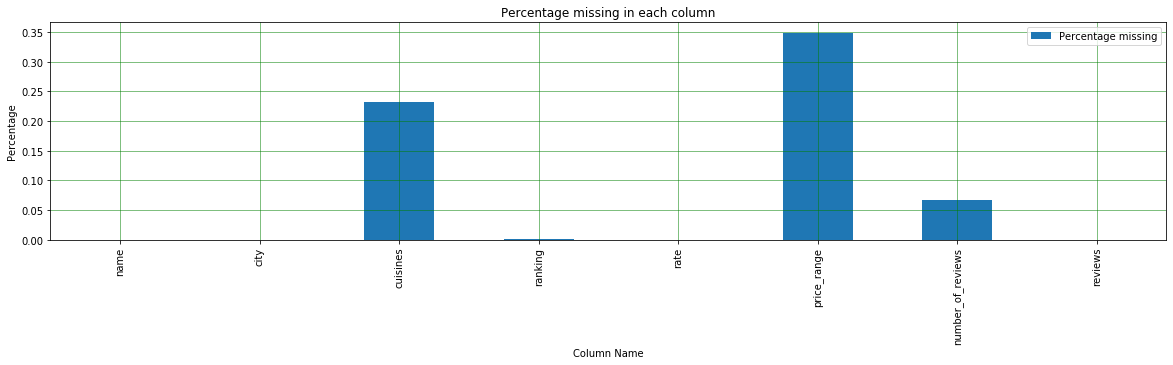

In [33]:
column_nan_ratios(restaurant_df)

In [34]:
restaurant_df.isnull().sum()

name                     0
city                     0
cuisines             26848
ranking                146
rate                     0
price_range          40421
number_of_reviews     7714
reviews                  5
dtype: int64

In [35]:
restaurant_df.shape

(115897, 8)

**The Rate column has zero missing values now**

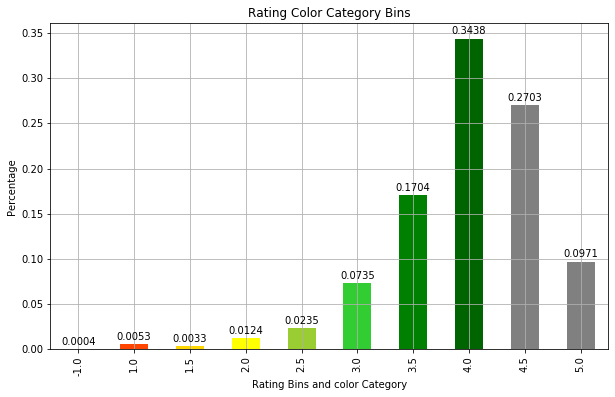

In [36]:
vs.color_bins(restaurant_df)

**Ratios of the Restaurants after dropping rate**
- 34.38% of the restaurants have ratings 4.0 has increased from before dropping rate by 2.64%. 
- 27.03% of the restaurants have ratings 4.5 has increased from before dropping rate by 2.07%.
- Only 9.71% of the restaurants have ratings 5 has increased from before dropping rate by 0.74%..
- This time Only 34.74% of the restaurant falls on the right of the curve.

In [37]:
# Checking unique values count for rate after dropping rate
restaurant_df.rate.value_counts(dropna=False)

 4.0    39843
 4.5    31326
 3.5    19745
 5.0    11257
 3.0     8524
 2.5     2720
 2.0     1437
 1.0      620
 1.5      384
-1.0       41
Name: rate, dtype: int64

3.9874414350673444


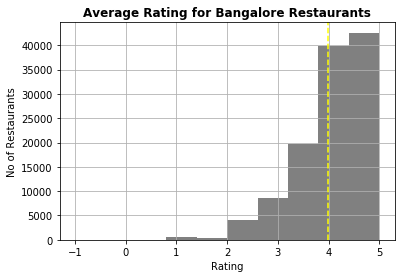

In [38]:
restaurant_df.rate.hist(color='grey')
plt.axvline(x= restaurant_df.rate.mean(),ls='--',color='yellow')
plt.title('Average Rating for Bangalore Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(restaurant_df.rate.mean())

#### The Average rating per restaurant in Banglore is found to be very close to **4**.

In [39]:
restaurant_df.head()

,name,city,cuisines,ranking,rate,price_range,number_of_reviews,reviews
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ..."
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0..."
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau..."
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o..."
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience..."


## 3.3 Threshold for missing in rows

For this project I am dropping rows with more than 1 missing values

In [40]:
restaurant_df.isnull().sum()

name                     0
city                     0
cuisines             26848
ranking                146
rate                     0
price_range          40421
number_of_reviews     7714
reviews                  5
dtype: int64

In [41]:
restaurant_df

,name,city,cuisines,ranking,rate,price_range,number_of_reviews,reviews
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ..."
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0..."
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau..."
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o..."
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience..."
...,...,...,...,...,...,...,...,...
125450,not guilty Bellevue,Zurich,"['International', 'European', 'Contemporary', ...",1596.0,1.0,$$ - $$$,NaN,"[[], []]"
125451,Ly's Take Away,Zurich,NaN,1597.0,1.0,NaN,2.0,"[['Poor quality, small portions, miserable st...."
125452,Restaurant Gasthof Hirschen,Zurich,"['German', 'Swiss', 'European', 'Central Europ...",1598.0,1.0,NaN,2.0,"[[], []]"
125453,Hukka Restaurant & Hookah Lounge,Zurich,"['German', 'Belgian', 'Mediterranean', 'Europe...",1601.0,1.0,$$$$,NaN,"[[], []]"


In [42]:
restaurant_df.shape

(115897, 8)

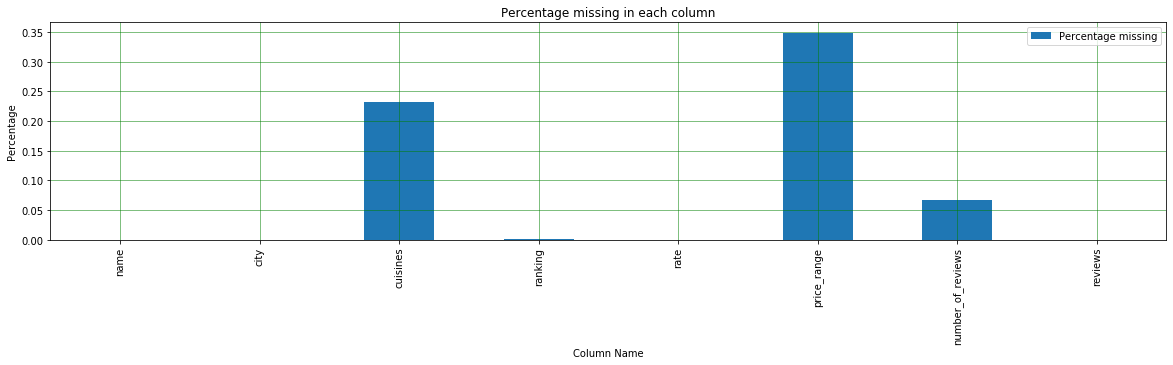

In [43]:
column_nan_ratios(restaurant_df)

In [44]:
threshold = 1
ls_threshold = restaurant_df.loc[((restaurant_df.isnull().sum(axis = 1)) <= threshold) & ((restaurant_df.isnull().sum(axis = 1)) != 0) ]
#Rows count for NaNs count more than threshold
gr_threshold = restaurant_df.loc[(restaurant_df.isnull().sum(axis = 1)) > threshold]

In [45]:
print("Number of Restaurants before dropping rows having missing valuemore than 1:",restaurant_df.shape[0])
print(ls_threshold.shape[0])
print(gr_threshold.shape[0])


Number of Restaurants before dropping rows having missing valuemore than 1: 115897
12479
29193


In [46]:
restaurant_df.dropna(thresh = len(restaurant_df.columns)-threshold,inplace = True)
print("Number of Restaurants after dropping rows having missing valuemore than 1:",restaurant_df.shape[0])

Number of Restaurants after dropping rows having missing valuemore than 1: 86704


In [47]:
restaurant_df

,name,city,cuisines,ranking,rate,price_range,number_of_reviews,reviews
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ..."
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0..."
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau..."
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o..."
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience..."
...,...,...,...,...,...,...,...,...
125445,Ristorante La Taverna,Zurich,"['Italian', 'Vegetarian Friendly']",1591.0,4.5,$$ - $$$,16.0,"[['Super local eatery', 'Small and charming pl..."
125448,Pizza Blitz Zurich,Zurich,['Pizza'],1594.0,2.0,NaN,5.0,"[[""Don't waste your time, go somewhere else!"",..."
125450,not guilty Bellevue,Zurich,"['International', 'European', 'Contemporary', ...",1596.0,1.0,$$ - $$$,NaN,"[[], []]"
125452,Restaurant Gasthof Hirschen,Zurich,"['German', 'Swiss', 'European', 'Central Europ...",1598.0,1.0,NaN,2.0,"[[], []]"


In [48]:
restaurant_df.isnull().sum()

name                     0
city                     0
cuisines                 0
ranking                 14
rate                     0
price_range          11261
number_of_reviews     1204
reviews                  0
dtype: int64

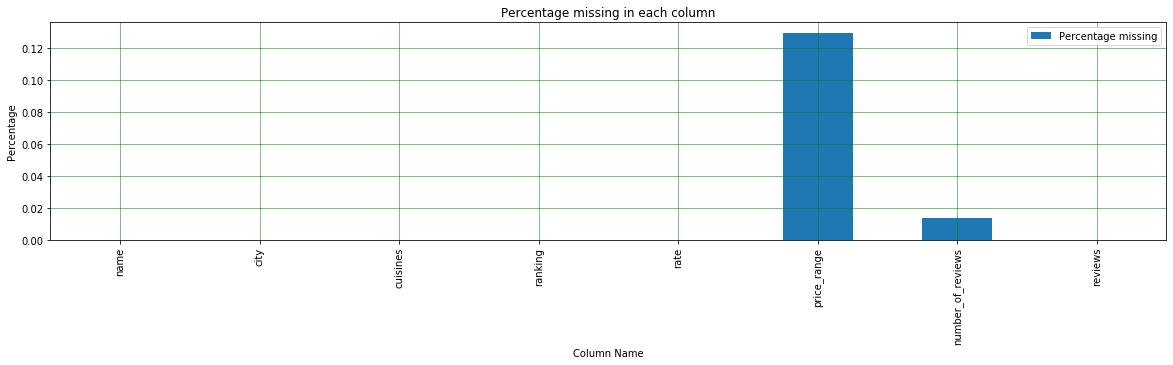

In [49]:
column_nan_ratios(restaurant_df)

**Inference**<br>
- Removed the row which has more than 1 missing value.
- Before removing the row we have the row as 115897 and missing value for 
        name                     0
        city                     0
        cuisines             26848
        ranking                146
        rate                     0
        price_range          40421
        number_of_reviews     7714
        reviews                  5
        
- After removing the row we have the row as 86704 and missing value become now are
        name                     0
        city                     0
        cuisines                 0
        ranking                 14
        rate                     0
        price_range          11261
        number_of_reviews     1204
        reviews                  0
        
- From the above threshold drop we can see the the missing value for <br>
    **cuisines** tend to 0 means all cuisines missng values becomes 0 from 26848(i.e. 24%).<br>
    **ranking** drop from 146 to 14 which is less missing number now.<br>
    **price_range** heavy drop from 40421 to 11261 (i.e. from 38% -> 14%) but still large amount of missing value still there.<br>
    **number_of_reviews** drop from 7714 to 1204 which is still more number of missing value now.<br>
    **reviews** tend to 0 means all reviews missng values becomes 0 from 5(i.e. 0.02%)<br>


**Note-**
Finally we had left the missing value with **ranking**, **price_range**, and **number_of_reviews**. That is deal in further section.

<a id='location'></a>
## 3.4 City 

In [50]:
restaurant_df['city'].value_counts()[:20]

London       13243
Paris        10731
Barcelona     5884
Madrid        5863
Rome          5168
Milan         4567
Berlin        4157
Prague        3221
Lisbon        2721
Amsterdam     2696
Vienna        2443
Brussels      2282
Budapest      1897
Munich        1883
Lyon          1730
Stockholm     1653
Dublin        1633
Edinburgh     1534
Warsaw        1507
Hamburg       1501
Name: city, dtype: int64

The locations are stored in "city" columns. the visualization will show the locations and the counts of restaurants present there.<br>


In [51]:
def location(df):
    '''
    plots bar graph for counts with unique values in location column
    
    '''
    
    location_count = df['city'].value_counts()
    print("Total City:",df['city'].value_counts().shape[0],"\nCity:",df['city'].value_counts().keys())
    print("\n Top 30 City with restaurant Counts")
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(location_count.keys()[0:32],location_count.values[0:32]) 
    ax.grid(color='g', linestyle='-', linewidth=.5)
    ax.set_xlabel('City') 
    ax.set_ylabel('Count')
    plt.title('Top 30 City with highest number of Restaurants')
    plt.xticks(rotation=90)
    plt.show()
    
    return 

Total City: 31 
City: Index(['London', 'Paris', 'Barcelona', 'Madrid', 'Rome', 'Milan', 'Berlin',
       'Prague', 'Lisbon', 'Amsterdam', 'Vienna', 'Brussels', 'Budapest',
       'Munich', 'Lyon', 'Stockholm', 'Dublin', 'Edinburgh', 'Warsaw',
       'Hamburg', 'Copenhagen', 'Athens', 'Zurich', 'Oporto', 'Geneva',
       'Krakow', 'Helsinki', 'Oslo', 'Bratislava', 'Luxembourg', 'Ljubljana'],
      dtype='object')

 Top 30 City with restaurant Counts


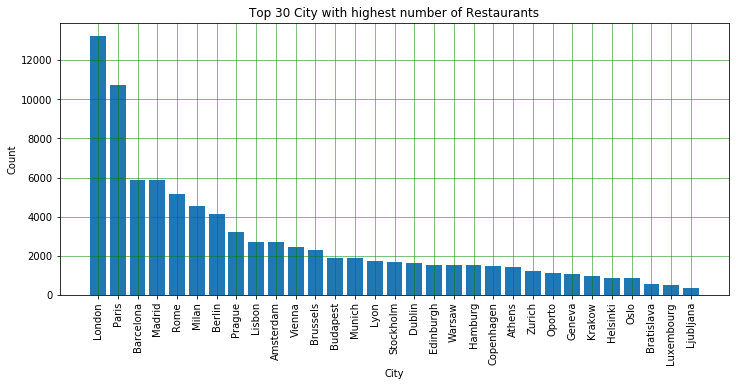

In [52]:
location(restaurant_df)

Text(0.5, 1.0, 'Location wise count for restaurants')

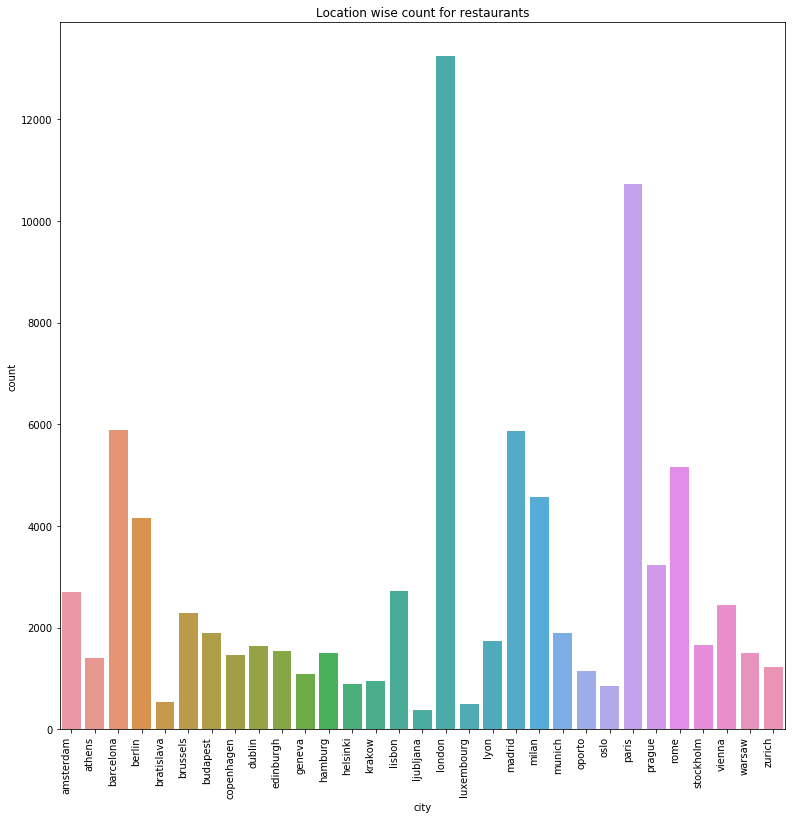

In [160]:
sns.countplot(restaurant_df['city'])
sns.countplot(restaurant_df['city']).set_xticklabels(sns.countplot(restaurant_df['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location wise count for restaurants')

## 3.4.1 City and Rating

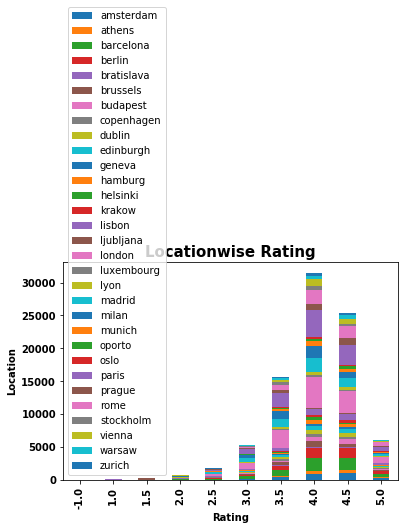

In [162]:
loc_plt=pd.crosstab(restaurant_df['rate'],restaurant_df['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Locationwise Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend()

## 3.3 No. of Restaurants in a Location

Text(0.5, 1.0, 'NO. of restaurants in a Location')

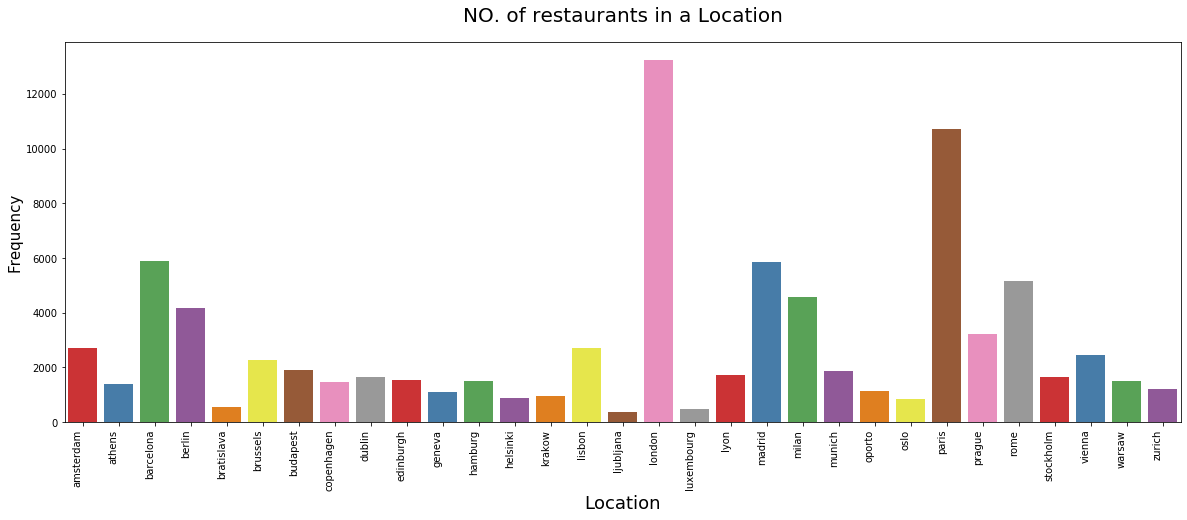

In [163]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="city",data=restaurant_df, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

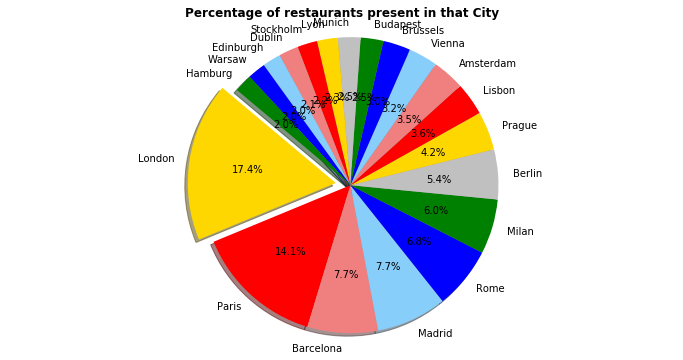

In [53]:
plt.figure(figsize = (12,6))
names = restaurant_df['city'].value_counts()[:20].index
values = restaurant_df['city'].value_counts()[:20].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0, 0, 0, 0,0,0,0,0,0,0, 0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that City", weight = 'bold')
plt.show()

There are about 31 city which gives restaurant counts.
- **London** has **maximum** number of restaurants where as **Ljubljana** has **minimum** number of restaurants

<a id='cuisines'></a>
## 3.5 Cuisines

Cuisines is a mixed categorical column eg. 'French', 'Dutch', 'European'. A restaurant can have upto 8 cuisines mentioned, which are comma separated.
Some restaurants have more than one cusines. <br>Number of cuisines: restaurant counts. 


In [54]:
restaurant_df.loc[0]['cuisines']

"['French', 'Dutch', 'European']"

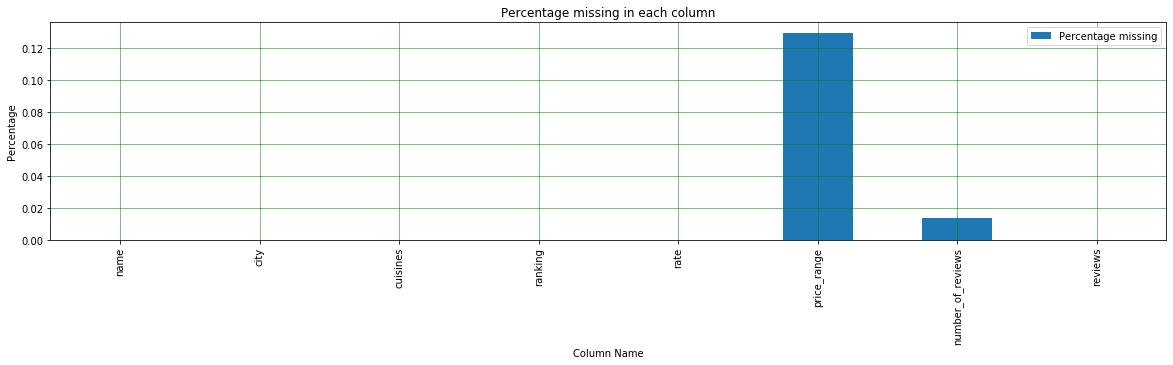

In [55]:
column_nan_ratios(restaurant_df)

We already seen that there is no missing value for cuisines

In [56]:
restaurant_df.shape

(86704, 8)

In [57]:
data = restaurant_df.copy()

### 3.5.1 Droping the value which have NaN missing data in cuisines if in further cases to deal with missing value for cuisines

In [58]:
data=data[data.cuisines.isna()==False]

In [59]:
data.isna().sum()

name                     0
city                     0
cuisines                 0
ranking                 14
rate                     0
price_range          11261
number_of_reviews     1204
reviews                  0
dtype: int64

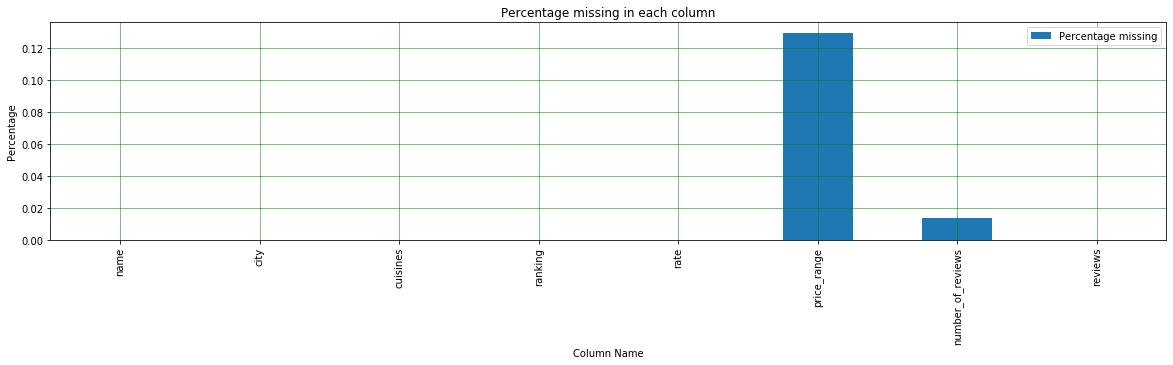

In [60]:
column_nan_ratios(data)

In [61]:
data.isna().sum()

name                     0
city                     0
cuisines                 0
ranking                 14
rate                     0
price_range          11261
number_of_reviews     1204
reviews                  0
dtype: int64

Now there are no missing value for Cuisines

In [62]:
data.shape

(86704, 8)

In [63]:
data.head()

,name,city,cuisines,ranking,rate,price_range,number_of_reviews,reviews
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ..."
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0..."
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau..."
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o..."
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience..."


### 3.5.2 Data cleaning for cuisines

In [64]:
# data['cuisines'] = data.apply(lambda x: lower_(x.cuisines), axis=1)

data['cuisines'] = data.cuisines.astype(str).str.replace('\[|\]|\'', '')
data['cuisines'] = data.cuisines.apply(lambda x:x.lower().strip())
data['cuisines'] = data['cuisines'].str.replace(' ' , '') 
data['cuisines'] = data['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
# data['cuisines'].value_counts().head()

# data['cuisines'] = data[data.cuisines.notnull()]

In [65]:
data.tail()

,name,city,cuisines,ranking,rate,price_range,number_of_reviews,reviews
125445,Ristorante La Taverna,Zurich,"italian,vegetarianfriendly",1591.0,4.5,$$ - $$$,16.0,"[['Super local eatery', 'Small and charming pl..."
125448,Pizza Blitz Zurich,Zurich,pizza,1594.0,2.0,NaN,5.0,"[[""Don't waste your time, go somewhere else!"",..."
125450,not guilty Bellevue,Zurich,"international,european,contemporary,healthy",1596.0,1.0,$$ - $$$,NaN,"[[], []]"
125452,Restaurant Gasthof Hirschen,Zurich,"german,swiss,european,centraleuropean",1598.0,1.0,NaN,2.0,"[[], []]"
125453,Hukka Restaurant & Hookah Lounge,Zurich,"german,belgian,mediterranean,european",1601.0,1.0,$$$$,NaN,"[[], []]"


In [66]:
data.shape

(86704, 8)

In [67]:
data.cuisines.nunique()

20170

### 3.5.3 Total number of cuisines count

In [68]:
cuisines_count= []

for i in data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

In [69]:
len(cuisines_count)

272934

In [70]:
#  using set it will remove the duplicacy of cuisines
unique_cuisines = (set(cuisines_count))

In [71]:
len(unique_cuisines)

126

Text(0, 0.5, 'No of restaurants')

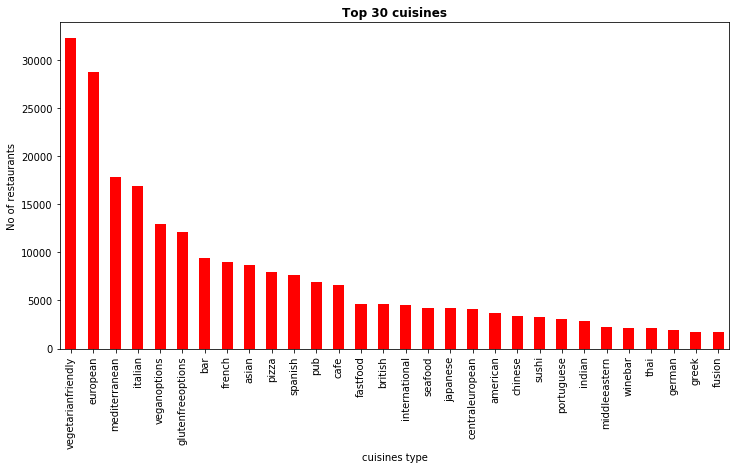

In [72]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:30].plot(kind='bar',color= 'r')
plt.title('Top 30 cuisines',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

**Inference**<br>
- There are more than 30,000 restaurants which servies **vegetarian friendly**, which makes it the top served cusine, followed by **european** and **mediterranean** Food.
- **german, greek, fusion**, and many more cusines are the least served cuisines with only 500-600 places serving them while calculating top 30 cuisines.

In [73]:
data.tail(10)

,name,city,cuisines,ranking,rate,price_range,number_of_reviews,reviews
125438,Jade,Zurich,"chinese,swiss,mediterranean,european",1584.0,3.0,$$$$,21.0,"[['Horrible!', 'It was really horrible, I woul..."
125440,Pizza-Blitz Zurich-Oerlikon,Zurich,"italian,pizza",1586.0,2.5,NaN,16.0,"[['Good service', '38 USD for a pizza!! HORRIB..."
125441,Restaurant Wehrlischloss,Zurich,"steakhouse,swiss,european",1587.0,2.0,NaN,8.0,"[['Very basic'], ['05/11/2016']]"
125443,Swiss Food Delivery,Zurich,"italian,chinese,american,indian,thai",1589.0,2.5,NaN,3.0,"[['Good Service'], ['12/15/2015']]"
125444,Restaurant Moringa Teff,Zurich,"italian,african,ethiopian",1590.0,5.0,$$ - $$$,NaN,"[[], []]"
125445,Ristorante La Taverna,Zurich,"italian,vegetarianfriendly",1591.0,4.5,$$ - $$$,16.0,"[['Super local eatery', 'Small and charming pl..."
125448,Pizza Blitz Zurich,Zurich,pizza,1594.0,2.0,NaN,5.0,"[[""Don't waste your time, go somewhere else!"",..."
125450,not guilty Bellevue,Zurich,"international,european,contemporary,healthy",1596.0,1.0,$$ - $$$,NaN,"[[], []]"
125452,Restaurant Gasthof Hirschen,Zurich,"german,swiss,european,centraleuropean",1598.0,1.0,NaN,2.0,"[[], []]"
125453,Hukka Restaurant & Hookah Lounge,Zurich,"german,belgian,mediterranean,european",1601.0,1.0,$$$$,NaN,"[[], []]"


In [74]:
data_2 = data.copy()

In [75]:
restaurant_df = data_2.copy()

In [76]:
data_2.shape

(86704, 8)

In [77]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86704 entries, 0 to 125453
Data columns (total 8 columns):
name                 86704 non-null object
city                 86704 non-null object
cuisines             86704 non-null object
ranking              86690 non-null float64
rate                 86704 non-null float64
price_range          75443 non-null object
number_of_reviews    85500 non-null float64
reviews              86704 non-null object
dtypes: float64(3), object(5)
memory usage: 6.0+ MB


<a id='precol'></a>
## 3.6 Reencoding columns

In this section the columns are preprossed from string values to integer/binary values. Some of the columns are of object type and needs to be converted. the remaining 8 columns are:
- Numerical data in form of string
- nominal categorical data
- mixed nominal categorical data

**About Columns:**
    
1. Numerical,float
    - `rate` - 1, 1.5, 2.0, ...., 4.5, 5
    - `ranking` - numbers provided
    - `number_of_reviews` -  number provided



2. Multi level categorical columns
    - `city`  - location of the restaurant in the city eg. 'London', 'Paris', 'Barcelona' - 31 unique names
    - `name`  - name of the restaurant in the city eg. 'Jade', 'Pizza Blitz Zurich', 'Restaurant Gasthof Hirschen' - 78775 unique names
    - `price_range`  - price range of the restaurant among 3 categories.
    - `reviews`  - 2 reviews that are displayed on the restaurants scrolling page of the city, as a list of list object where the first list contains the 2 reviews, and the second le dates.

3. Mixed categorical columns
    - `cuisines` - cuisines type as menstioned by the restaurant - restaurant may have cuisines type between some range.





In [105]:
# total unique name for name
data_2.name.nunique()

78775

In [78]:
data_2.price_range.unique()

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

### 3.6.1 Numerical,float

- `rate` - 1, 1.5, 2.0, ...., 4.5, 5 which is in float that is good for prediction.
- `ranking` - numbers provided in float to convert in integer as ranking always in integer format
- `number_of_reviews` -  numbers provided in float to convert in integer as number_of_reviews always in whole number format

In [79]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86704 entries, 0 to 125453
Data columns (total 8 columns):
name                 86704 non-null object
city                 86704 non-null object
cuisines             86704 non-null object
ranking              86690 non-null float64
rate                 86704 non-null float64
price_range          75443 non-null object
number_of_reviews    85500 non-null float64
reviews              86704 non-null object
dtypes: float64(3), object(5)
memory usage: 6.0+ MB


In [81]:
# data_2.ranking = data_2.apply(lambda x: float_to_int(x.ranking), axis=1)

In [82]:
data_2.ranking = data_2.ranking.astype('Int64')

In [83]:
data_2.number_of_reviews = data_2.number_of_reviews.astype('Int64')

In [84]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86704 entries, 0 to 125453
Data columns (total 8 columns):
name                 86704 non-null object
city                 86704 non-null object
cuisines             86704 non-null object
ranking              86690 non-null Int64
rate                 86704 non-null float64
price_range          75443 non-null object
number_of_reviews    85500 non-null Int64
reviews              86704 non-null object
dtypes: Int64(2), float64(1), object(5)
memory usage: 6.1+ MB


In [85]:
data_2.tail()

,name,city,cuisines,ranking,rate,price_range,number_of_reviews,reviews
125445,Ristorante La Taverna,Zurich,"italian,vegetarianfriendly",1591,4.5,$$ - $$$,16,"[['Super local eatery', 'Small and charming pl..."
125448,Pizza Blitz Zurich,Zurich,pizza,1594,2.0,NaN,5,"[[""Don't waste your time, go somewhere else!"",..."
125450,not guilty Bellevue,Zurich,"international,european,contemporary,healthy",1596,1.0,$$ - $$$,NaN,"[[], []]"
125452,Restaurant Gasthof Hirschen,Zurich,"german,swiss,european,centraleuropean",1598,1.0,NaN,2,"[[], []]"
125453,Hukka Restaurant & Hookah Lounge,Zurich,"german,belgian,mediterranean,european",1601,1.0,$$$$,NaN,"[[], []]"


**Inference:**
- Now ranking and number_of_reviews are in integer from float.

In [86]:
data_2.corr()

,ranking,rate,number_of_reviews
ranking,1.000000,-0.390605,-0.218121
rate,-0.390605,1.000000,0.031851
number_of_reviews,-0.218121,0.031851,1.000000


**Inference:**<br>
- small negative correlation can be seen between rates and ranking which was expected
- a negative correlation can be seen between number_of_reviews and rates.

In [87]:
data_2.columns

Index(['name', 'city', 'cuisines', 'ranking', 'rate', 'price_range',
       'number_of_reviews', 'reviews'],
      dtype='object')

### 3.6.2 Multi level categorical columns

#### 1. Methods to deal with multi level categorical values

The city columns is nominal as the name there are total 31 distinct city for Restaurants.
- Creating dummy values
- creating new levels based on frequency
- Converting to numeric values - label encoding
- Hashing
there are other complicated encoders such as Hermet, sum, backward, polynomial encoders
>For my project **I used creating dummy variables** because it saves all the information in form of binary input. Giving labels to more than 30 values will takeout all the information but it will be difficult to process the data for prediction for single prediction as well.

In [99]:
data_2['city'] = data.city.apply(lambda x:x.lower().strip())

## Name

In [106]:
data_2['name'] = data.name.apply(lambda x:x.lower().strip())

### Most famous Restaurant chains

Text(0.5, 0, 'Number of outlets')

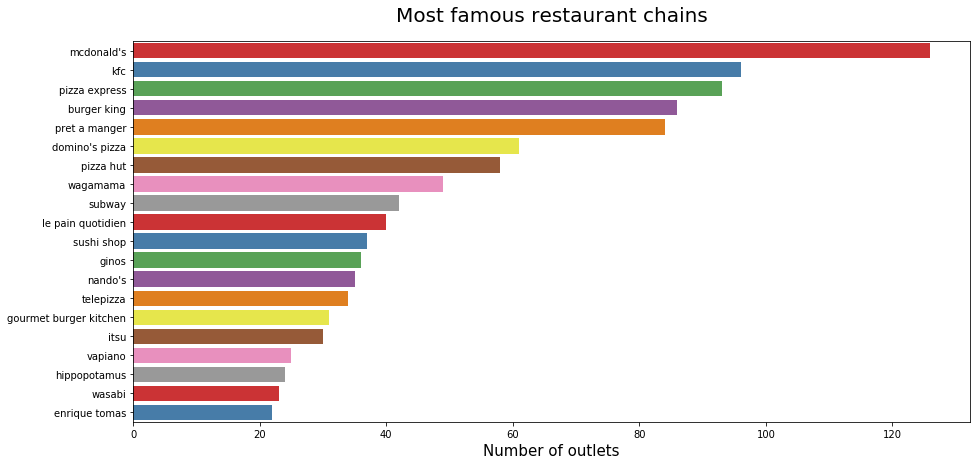

In [164]:
plt.figure(figsize=(15,7))
chains=data_2['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

#### 2. price_range

In [107]:
restaurant_df = data_2.copy()

In [108]:
#  to count value for each category occurence
restaurant_df['price_range'].value_counts(dropna=False)

$$ - $$$    53169
$           18121
NaN         11261
$$$$         4153
Name: price_range, dtype: int64

- price range have NaN value will deal this NaN in further section
- categorise this 3 names as low, medium and high

In [109]:
restaurant_df = restaurant_df.replace({'price_range' : { '$$ - $$$' : 'low', '$' : 'medium', '$$$$' : 'high' }})

In [110]:
restaurant_df.tail(20)

,name,city,cuisines,ranking,rate,price_range,number_of_reviews,reviews
125420,libanesisches essen,zurich,middleeastern,1566,3.5,NaN,12,"[['These people are rude!', 'Avoid'], ['05/30/..."
125421,ta ty asian restaurant,zurich,asian,1567,2.5,NaN,3,"[[], []]"
125422,bistro lochergut,zurich,italian,1568,3.0,NaN,2,"[[], []]"
125423,taj palace,zurich,"indian,asian,vegetarianfriendly,halal",1569,2.5,low,53,"[['Good food and nice experience', 'Disappoint..."
125424,tasteria,zurich,international,1570,4.0,NaN,2,"[[], []]"
125425,milchbar-am-bellevue,zurich,european,1571,2.5,NaN,11,"[['Babyccino - Babies delight', 'Nice little p..."
125433,cocoa beach zurich,zurich,"bar,pub",1579,2.0,NaN,10,"[['Wannabes', 'Terrible service but good conce..."
125434,forum,zurich,"mediterranean,european,centraleuropean,bar,veg...",1580,3.5,low,104,"[['Good service', 'nice atmoshphere'], ['06/27..."
125435,purpur,zurich,bar,1581,2.0,low,150,"[['Worst New Year’s Eve experience', 'HORRIBLE..."
125436,windegg,zurich,"swiss,european,centraleuropean",1582,3.0,NaN,3,[['Not just a restaurant but maybe it should.....


In [111]:
#  to count value for each category occurence
restaurant_df['price_range'].value_counts(dropna=False)

low       53169
medium    18121
NaN       11261
high       4153
Name: price_range, dtype: int64

In [112]:
restaurant_df['price_range'].mode()

0    low
dtype: object

### 2.1 To deal missing value for price_range will Assigning An Unique Category


- A categorical feature will have a definite number of possibilities, such as gender, for example. Since they have a definite number of classes, we can assign another class for the missing values. Here, the features **price_range** have missing values which can be replaced with a new category, say, U for ‘unknown’. This strategy will add more information into the dataset which will result in the change of variance. Since they are categorical, we need to find one hot encoding to convert it to a numeric form for the algorithm to understand it and this is my aprroach.

In [113]:
restaurant_df.tail()

,name,city,cuisines,ranking,rate,price_range,number_of_reviews,reviews
125445,ristorante la taverna,zurich,"italian,vegetarianfriendly",1591,4.5,low,16,"[['Super local eatery', 'Small and charming pl..."
125448,pizza blitz zurich,zurich,pizza,1594,2.0,NaN,5,"[[""Don't waste your time, go somewhere else!"",..."
125450,not guilty bellevue,zurich,"international,european,contemporary,healthy",1596,1.0,low,NaN,"[[], []]"
125452,restaurant gasthof hirschen,zurich,"german,swiss,european,centraleuropean",1598,1.0,NaN,2,"[[], []]"
125453,hukka restaurant & hookah lounge,zurich,"german,belgian,mediterranean,european",1601,1.0,high,NaN,"[[], []]"


In [114]:
restaurant_df['price_range'].fillna('U', inplace = True)

In [115]:
restaurant_df.tail()

,name,city,cuisines,ranking,rate,price_range,number_of_reviews,reviews
125445,ristorante la taverna,zurich,"italian,vegetarianfriendly",1591,4.5,low,16,"[['Super local eatery', 'Small and charming pl..."
125448,pizza blitz zurich,zurich,pizza,1594,2.0,U,5,"[[""Don't waste your time, go somewhere else!"",..."
125450,not guilty bellevue,zurich,"international,european,contemporary,healthy",1596,1.0,low,NaN,"[[], []]"
125452,restaurant gasthof hirschen,zurich,"german,swiss,european,centraleuropean",1598,1.0,U,2,"[[], []]"
125453,hukka restaurant & hookah lounge,zurich,"german,belgian,mediterranean,european",1601,1.0,high,NaN,"[[], []]"


#### Pros and Cons for assigning unique category.
**Pros:**<br>
 - Less possibilities with one extra category, resulting in low variance after one hot encoding — since it is categorical.
 - Negates the loss of data by adding an unique category.
<br>

**Cons:**<br>
- Adds less variance
- Adds another feature to the model while encoding, which may result in poor performance

In [116]:
#  to count value for each category occurence
restaurant_df['price_range'].value_counts(dropna=False)

low       53169
medium    18121
U         11261
high       4153
Name: price_range, dtype: int64

In [97]:
restaurant_df.isna().sum()

name                    0
city                    0
cuisines                0
ranking                14
rate                    0
price_range             0
number_of_reviews    1204
reviews                 0
dtype: int64

In [98]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86704 entries, 0 to 125453
Data columns (total 8 columns):
name                 86704 non-null object
city                 86704 non-null object
cuisines             86704 non-null object
ranking              86690 non-null Int64
rate                 86704 non-null float64
price_range          86704 non-null object
number_of_reviews    85500 non-null Int64
reviews              86704 non-null object
dtypes: Int64(2), float64(1), object(5)
memory usage: 6.1+ MB


#### 3. reviews

In [117]:
# restaurant_df = data_2.copy()

In [118]:
restaurant_df['new_reviews'] = restaurant_df.reviews.str[1:-1].str.split(',').tolist()

In [119]:
restaurant_df['new_reviews'][1]

["['Great food and staff'",
 " 'just perfect']",
 " ['01/06/2018'",
 " '01/04/2018']"]

In [120]:
# restaurant_df['res']
restaurant_df["new_reviews"] = restaurant_df["new_reviews"].str[0:2]

In [121]:
restaurant_df['new_reviews'][1]

["['Great food and staff'", " 'just perfect']"]

In [122]:
restaurant_df["new_reviews"] =restaurant_df['new_reviews'].astype(str).str.replace('\[|\]|\'', '')

In [123]:
restaurant_df['new_reviews'][1]

'"Great food and staff", " just perfect"'

In [124]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = list((stopwords.words('english')))
def text_prepare(text,join_sumbol):
    """
        text: a string
        
        return: modified initial string
    """
    
    # lowercase text
    text = text.lower()
    # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = re.sub(REPLACE_BY_SPACE_RE," ",text,)
    text = re.sub('[0-9]'," ",text,)
    # delete symbols which are in BAD_SYMBOLS_RE from text
    text = re.sub(BAD_SYMBOLS_RE," ",text)
    text = re.sub(r'\s+'," ",text)
    # delete stopwords from text
    text = f'{join_sumbol}'.join([i for i in text.split() if i not in STOPWORDS])
    
    return text

In [125]:
restaurant_df["new_reviews"] = restaurant_df["new_reviews"].apply(lambda x : text_prepare(x, " "))

In [126]:
restaurant_df["new_reviews"][1]

'great food staff perfect'

In [127]:
restaurant_df.tail()

,name,city,cuisines,ranking,rate,price_range,number_of_reviews,reviews,new_reviews
125445,ristorante la taverna,zurich,"italian,vegetarianfriendly",1591,4.5,low,16,"[['Super local eatery', 'Small and charming pl...",super local eatery small charming place
125448,pizza blitz zurich,zurich,pizza,1594,2.0,U,5,"[[""Don't waste your time, go somewhere else!"",...",waste time go somewhere else
125450,not guilty bellevue,zurich,"international,european,contemporary,healthy",1596,1.0,low,NaN,"[[], []]",
125452,restaurant gasthof hirschen,zurich,"german,swiss,european,centraleuropean",1598,1.0,U,2,"[[], []]",
125453,hukka restaurant & hookah lounge,zurich,"german,belgian,mediterranean,european",1601,1.0,high,NaN,"[[], []]",


In [128]:
restaurant_df.isna().sum()

name                    0
city                    0
cuisines                0
ranking                14
rate                    0
price_range             0
number_of_reviews    1204
reviews                 0
new_reviews             0
dtype: int64

In [129]:
restaurant_df.new_reviews[125452]

''

In [130]:
# # to replace each empty string in a pandas DataFrame with NaN 
# restaurant_df.new_reviews = restaurant_df.new_reviews.replace(r'^\s*$', np.NaN, regex=True)

In [131]:
restaurant_df.tail(10)

,name,city,cuisines,ranking,rate,price_range,number_of_reviews,reviews,new_reviews
125438,jade,zurich,"chinese,swiss,mediterranean,european",1584,3.0,high,21,"[['Horrible!', 'It was really horrible, I woul...",horrible really horrible
125440,pizza-blitz zurich-oerlikon,zurich,"italian,pizza",1586,2.5,U,16,"[['Good service', '38 USD for a pizza!! HORRIB...",good service usd pizza horrible pricing
125441,restaurant wehrlischloss,zurich,"steakhouse,swiss,european",1587,2.0,U,8,"[['Very basic'], ['05/11/2016']]",basic
125443,swiss food delivery,zurich,"italian,chinese,american,indian,thai",1589,2.5,U,3,"[['Good Service'], ['12/15/2015']]",good service
125444,restaurant moringa teff,zurich,"italian,african,ethiopian",1590,5.0,low,NaN,"[[], []]",
125445,ristorante la taverna,zurich,"italian,vegetarianfriendly",1591,4.5,low,16,"[['Super local eatery', 'Small and charming pl...",super local eatery small charming place
125448,pizza blitz zurich,zurich,pizza,1594,2.0,U,5,"[[""Don't waste your time, go somewhere else!"",...",waste time go somewhere else
125450,not guilty bellevue,zurich,"international,european,contemporary,healthy",1596,1.0,low,NaN,"[[], []]",
125452,restaurant gasthof hirschen,zurich,"german,swiss,european,centraleuropean",1598,1.0,U,2,"[[], []]",
125453,hukka restaurant & hookah lounge,zurich,"german,belgian,mediterranean,european",1601,1.0,high,NaN,"[[], []]",


In [132]:
# drop unnecessary column reviews
restaurant_df.drop(columns=["reviews"], inplace  =True)

In [133]:
restaurant_df.isna().sum()

name                    0
city                    0
cuisines                0
ranking                14
rate                    0
price_range             0
number_of_reviews    1204
new_reviews             0
dtype: int64

In [134]:
restaurant_df.shape

(86704, 8)

In [135]:
restaurant_df.tail()

,name,city,cuisines,ranking,rate,price_range,number_of_reviews,new_reviews
125445,ristorante la taverna,zurich,"italian,vegetarianfriendly",1591,4.5,low,16,super local eatery small charming place
125448,pizza blitz zurich,zurich,pizza,1594,2.0,U,5,waste time go somewhere else
125450,not guilty bellevue,zurich,"international,european,contemporary,healthy",1596,1.0,low,NaN,
125452,restaurant gasthof hirschen,zurich,"german,swiss,european,centraleuropean",1598,1.0,U,2,
125453,hukka restaurant & hookah lounge,zurich,"german,belgian,mediterranean,european",1601,1.0,high,NaN,


In [137]:
restaurant_df.new_reviews.nunique()

75869

# 3.7 Encode the input Variables

In [136]:

def Encode(df):
    for column in df.columns[~df.columns.isin(['ranking', 'rate', 'number_of_reviews'])]:
        df[column] = df[column].factorize()[0]
    return df

restaurant_df_en = Encode(restaurant_df.copy())
restaurant_df_en.head() # looking at the dataset after transformation

,name,city,cuisines,ranking,rate,price_range,number_of_reviews,new_reviews
0,0,0,0,1,5.0,0,136,0
1,1,0,1,2,4.5,1,812,1
2,2,0,2,3,4.5,1,567,2
3,3,0,3,4,5.0,1,564,3
4,4,0,4,5,4.5,1,316,4


## 3.7.1 Get Correlation between different variables

Index(['name', 'city', 'cuisines', 'ranking', 'rate', 'price_range',
       'number_of_reviews', 'new_reviews'],
      dtype='object')

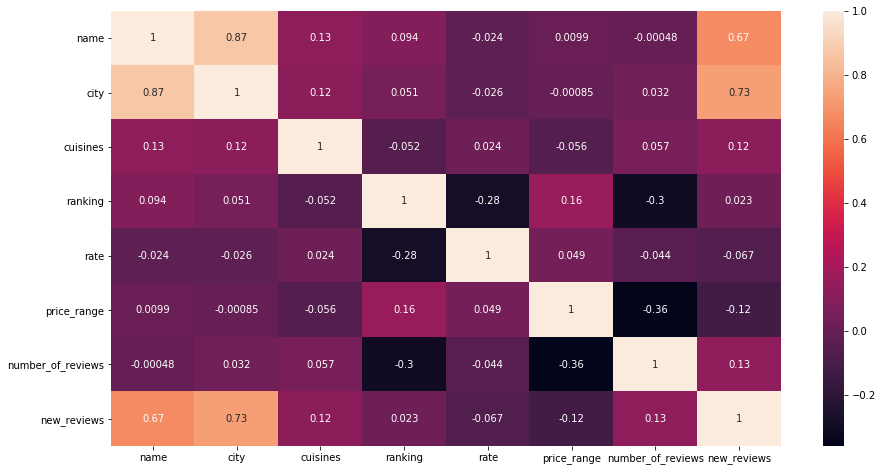

In [138]:

corr = restaurant_df_en.corr(method='kendall')
# plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
restaurant_df_en.columns

#### The highest correlation is between name and new_reviews which is 0.73 which is not of very much concern 

# 4 Regression Analysis

<a id='impfea'></a>
## 4.1 imputing and Feature Scaling

In [255]:
dataAfter = restaurant_df_en.copy()

In [256]:
#Defining the independent variables and dependent variables
target = dataAfter[['rate']]

features = dataAfter.drop(columns = ['rate', 'new_reviews', 'name'],axis = 1)

- name - most of the names have their short address with their names. The number of words can not be used to analyse the data

In [257]:
imp_median = SimpleImputer(missing_values=np.NaN, strategy='median')

In [258]:
restaurant_df_imp = pd.DataFrame(imp_median.fit_transform(features))

In [259]:
restaurant_df_imp.isnull().sum().sum()

0

In [260]:
restaurant_df_imp.columns = features.columns

In [261]:
restaurant_df_imp.head()

,city,cuisines,ranking,price_range,number_of_reviews
0,0.0,0.0,1.0,0.0,136.0
1,0.0,1.0,2.0,1.0,812.0
2,0.0,2.0,3.0,1.0,567.0
3,0.0,3.0,4.0,1.0,564.0
4,0.0,4.0,5.0,1.0,316.0


## 4.2 Scaling the data

> We scale the data because it helps to normalise the data within a particular range and every feature transforms to a common scale

- Z-score of the input data, relative to the sample mean and standard deviation.
- It allows us to calculate the probability of a score occurring within our normal distribution and enables us to compare two scores that are from different normal distributions.
- A Z-score is the number of standard deviations from the mean a data point is.
- A Z-score is also known as a standard score and it can be placed on a normal distribution curve.
- The Z-score is a test of statistical significance that helps you decide whether or not to reject the null hypothesis. The p-value is the probability that you have falsely rejected the null hypothesis.
- Z-scores are measures of standard deviation.

In [262]:
data_scaled=restaurant_df_imp.apply(zscore)
data_scaled.head()

,city,cuisines,ranking,price_range,number_of_reviews
0,-1.833984,-0.831255,-0.922911,-0.744400,-0.050956
1,-1.833984,-0.831068,-0.922631,0.125702,1.930327
2,-1.833984,-0.830880,-0.922350,0.125702,1.212258
3,-1.833984,-0.830692,-0.922070,0.125702,1.203466
4,-1.833984,-0.830505,-0.921790,0.125702,0.476604


## 4.2 Splitting the Dataset

In [266]:
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(restaurant_df_imp, target, test_size=.1,random_state=353)
x_train.head()

,city,cuisines,ranking,price_range,number_of_reviews
64041,24.0,67.0,3344.0,0.0,277.0
1224,0.0,332.0,1236.0,2.0,87.0
14681,5.0,4904.0,10.0,0.0,956.0
7963,2.0,2687.0,4489.0,0.0,62.0
58575,21.0,855.0,2355.0,2.0,8.0


In [267]:
y_train.head()

,rate
92740,4.0
1233,4.0
21951,4.5
9860,3.5
85948,3.5


In [268]:
x_train.shape

(78033, 5)

In [269]:
x_test.shape

(8671, 5)

In [270]:
y_train.shape

(78033, 1)

In [271]:
### Linear Regression

In [272]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

r2_score(y_test,y_pred)

0.1504748663547366

In [273]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

r2_score(y_test,y_predict)

0.6965013258399277

In [274]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor

In [275]:
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

r2_score(y_test,y_predict)

0.7508135963441009

In [276]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7152760818112625

In [277]:
xgb = XGBClassifier()
xgb = xgb.fit(x_train,y_train)

In [278]:
y_predict=xgb.predict(x_test)

r2_score(y_test,y_predict)

0.6459483376391028

## Limitation and  Conclusion

**Limitaions:**<br>
- The model can predict scores only for the REstaurants provided in csv 
- Assuming that missing numbers as unique U i.e no Price Range provided for restaurant
- restaurants have 1204 Number of Reviews and 14  Ranking missing which is replaced by median
- The model is only limited to predict Bengaluru Data
- Due to computation time and prediction for single data didn't go with one hot encoding and i go with encode the variabe 

**conclusion**
- The model is able to predict with 75% of accuracy 
- only 12.7% of restaurants have book table options in Bengaluru
- Only 65.71% of restaurants have ratings between including 4-5.


**Improvement**
- User interface can be made which takes inputs for a new restuaunts
- creating columns for cuisine types to separate the comma separated cuisines rather than encoding. use get dummy method then take top 10 most frequest cuisines as in columns
- XGBoost and other algorithms can be used to check if it performs better than Random forest



## References

https://docs.scipy.org/doc/numpy-1.14.0/reference/
https://pandas.pydata.org/
https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.arff.loadarff.html
https://github.com/iskandr/fancyimpute
https://pypi.org/project/impyute/
http://scikit-learn.org/stable/modules/preprocessing.html
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
https://docs.python.org/3/library/collections.html
http://xgboost.readthedocs.io/en/latest/python/python_api.html
http://scikit-learn.org/stable/modules/svm.html
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.ensemble.BalancedBaggingClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
https://docs.python.org/2/library/random.html
http://scikit-learn.org/stable/modules/classes.html

## End of Project